In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/weifeng/Library/Fonts/'

# get normal font and store it in `fira_sans_regular`
font_path = personal_path + 'Montserrat-Regular.ttf'
montserrat = FontProperties(fname=font_path)

# get bold font and store it in `fira_sans_bold`
font_path = personal_path + 'Montserrat-Bold.ttf'
montserrat_bold = FontProperties(fname=font_path)

In [3]:
df = pd.DataFrame()
for i in range(1,10):
    fname = 'salt'+str(i)+'.pkl'
    df_i = pd.read_pickle(fname)
    df_i = df_i[df_i['diff']>-0.0025]
    if df_i['cg'][0]==-3.45:
        df_i = df_i.rename(columns={"diff": "sub="+str(df_i['sub'][0])}).drop(columns=['sub', 'cg'])
        if len(df)==0:
            df = df_i
        else:
            df = df.merge(df_i, on='single_amount', how='outer')
            # df = pd.concat([df, df_i])
df['single_amount'] = df['single_amount']/100

In [4]:
df.to_csv('salt_agg.csv')

In [5]:
x = df['single_amount']
y = []
for i in range (1,4):
    y.append(df.iloc[:, i].tolist())
baseline = 0
labels = ["Small", "Medium", "Large"]

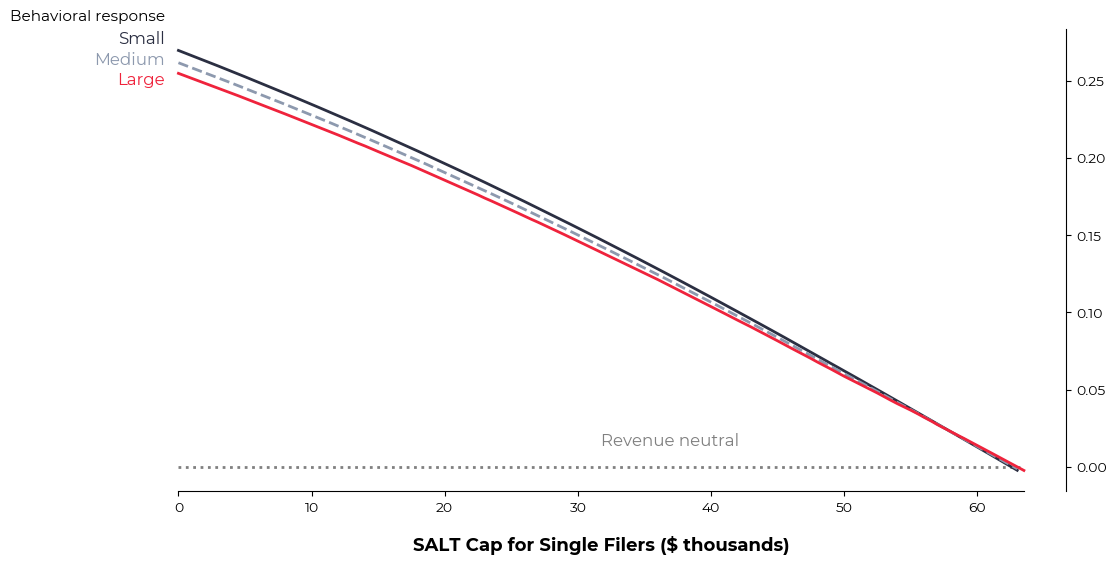

In [6]:
fig, ax = plt.subplots(
    figsize=(12, 6)
)  # This sets the figure size to 6 inches wide by 5 inches high

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
# plt.rc("font", family="Roboto")  # controls default font
# plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels=

# Define a nice color palette:
colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot the baseline
# ax.plot([x[0], max(x)], [baseline, baseline], label="Revenue Neutral")
ax.plot(
    [x[0], max(x)],
    [baseline, baseline],
    color="gray",
    linestyle=":",
    linewidth=2,
)
ax.text(
    max(x)/2,
    baseline,
    "Revenue neutral\n",
    color="gray",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="bottom",
    size=12,
    font=montserrat
)

# Plot the three model lines
for i, label in enumerate(labels):

    if label=='Small':
        ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
        v_adjust = 0.008
    elif label=='Large':
        ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
        v_adjust = -0.004
    else:
        ax.plot(x, y[i], label=label, color=colors[i], linewidth=2, linestyle="--")
        v_adjust = 0.002

    ax.text(
        x[0]-1,
        y[i][0]+v_adjust,
        label,
        color=colors[i],
        # fontweight="bold",
        horizontalalignment="right",
        verticalalignment="center",
        size=12,
    font=montserrat
    )

ax.text(
    x[0]-1,
    y[0][0]+0.022,
    'Behavioral response',
    # color=colors[i],
    fontweight="bold",
    horizontalalignment="right",
    verticalalignment="center",
    size=11,
    font=montserrat
)

# Hide the all but the bottom spines (axis lines)
# ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("right")
ax.yaxis.tick_right()
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(min(x), max(x))

ax.set_xlabel("SALT Cap for Single Filers ($ thousands)", labelpad=15, font=montserrat_bold, size=13)
# ax.set_title("Revenue Change from Baseline to Reform Over 10 Years ($ trillions)", pad=40, font=montserrat_bold, size=16)
# ax.legend()
# plt.show()

for tick in ax.get_xticklabels():
    tick.set_fontproperties(montserrat)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(montserrat)

fig.patch.set_alpha(0.0)
fig.savefig("salt_agg.png", dpi=300)